# ML Project 12

## Importing Libraries and Dataset

In [1]:
import os
os.chdir("C:/Users/ogulc/ÖNEMLİ ÇALIŞMALAR")

In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
##Model 
##Değerlendirme metrikleri

In [3]:
project_12 = pd.read_csv("Train_bigmart.csv")
test = pd.read_csv("Test_bigmart.csv")

In [4]:
project_12

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [5]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


## Analysing and Visualizing Data (EDA)

In [6]:
project_12.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### .info()

In [7]:
project_12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### .shape

In [8]:
project_12.shape

(8523, 12)

### .describe()

In [9]:
project_12.select_dtypes(include = ["float64", "int64"]).describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


### .unique(), .nunique() and .value_counts()

In [10]:
project_12.select_dtypes(include = ["object", "category"]).nunique()

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [11]:
project_12["Outlet_Establishment_Year"].nunique()

9

In [12]:
project_12["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64

In [13]:
#'Item_Fat_Content' sütununda LF, low fat ve reg kateogrileri farklı yazılmış olsa da Low Fat ve Regular ile aynı kategoridir
project_12["Item_Fat_Content"] = project_12["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"})

In [14]:
project_12["Item_Fat_Content"].value_counts()

Item_Fat_Content
Low Fat    5517
Regular    3006
Name: count, dtype: int64

In [15]:
project_12["Item_Type"].value_counts()

Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64

In [16]:
project_12["Outlet_Identifier"].value_counts()

Outlet_Identifier
OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: count, dtype: int64

In [17]:
project_12["Outlet_Size"].value_counts()

Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64

In [18]:
project_12["Outlet_Location_Type"].value_counts()

Outlet_Location_Type
Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: count, dtype: int64

In [19]:
project_12["Outlet_Type"].value_counts()

Outlet_Type
Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: count, dtype: int64

### Bar Graphs of `Item_Type`, `Item_Fat_Content`, `Outlet_Size`, `Outlet_Location_Type` and `Outlet_Type`

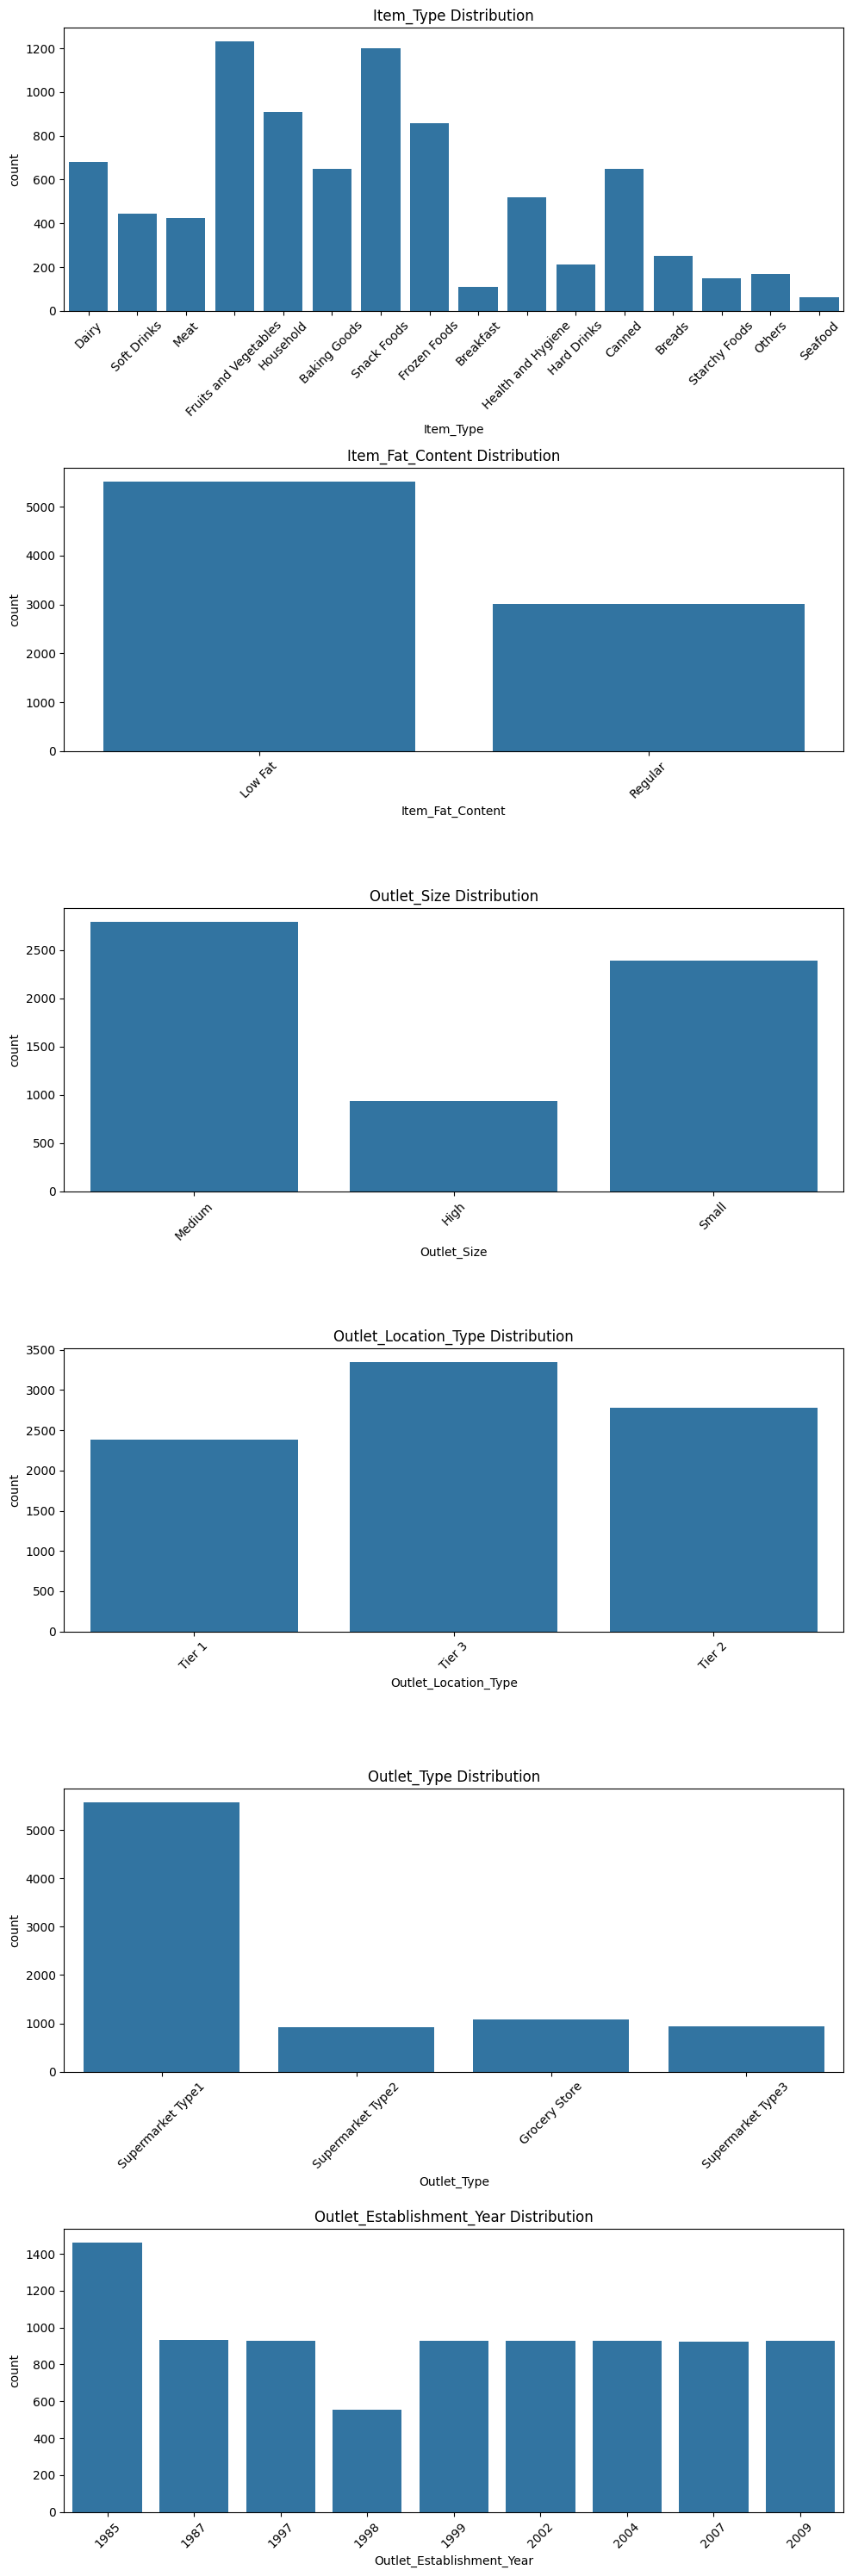

In [20]:
# Grafikleri çizmek istediğimiz sütunlar
columns = ['Item_Type', 'Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', "Outlet_Establishment_Year"]

# Grafiklerin boyutlarını ayarlama
plt.figure(figsize=(10, 30))

# Her bir sütun için bar grafiği çizme
for i, column in enumerate(columns, 1):
    plt.subplot(len(columns), 1, i)
    sns.countplot(data=project_12, x=column)
    plt.title(f'{column} Distribution')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

### Distplot of Numeric Columns 

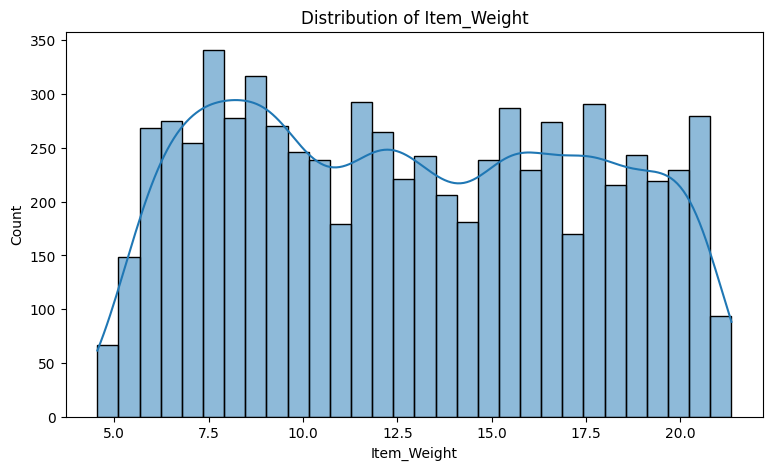

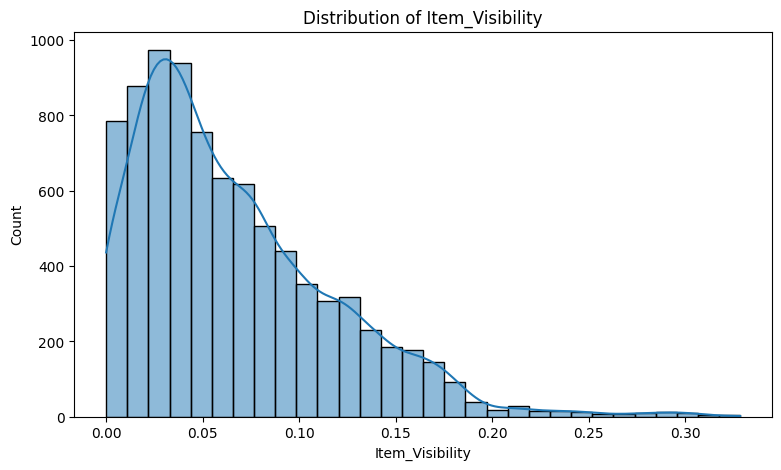

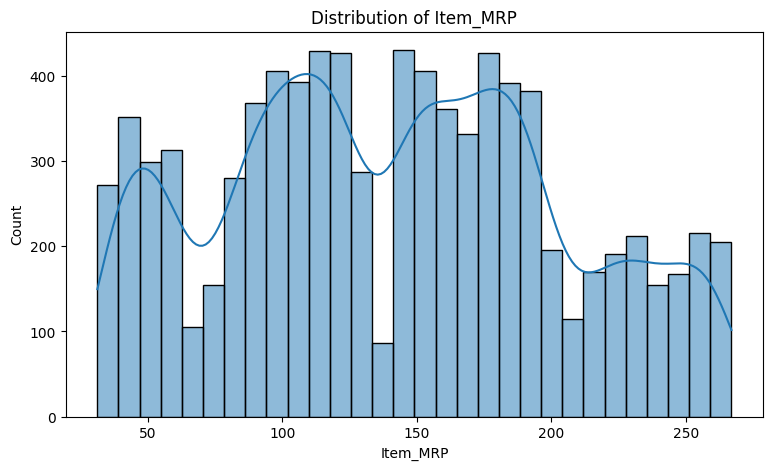

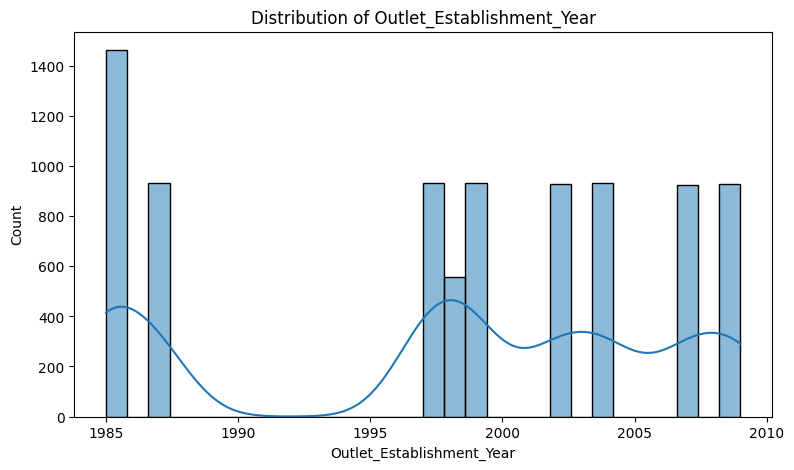

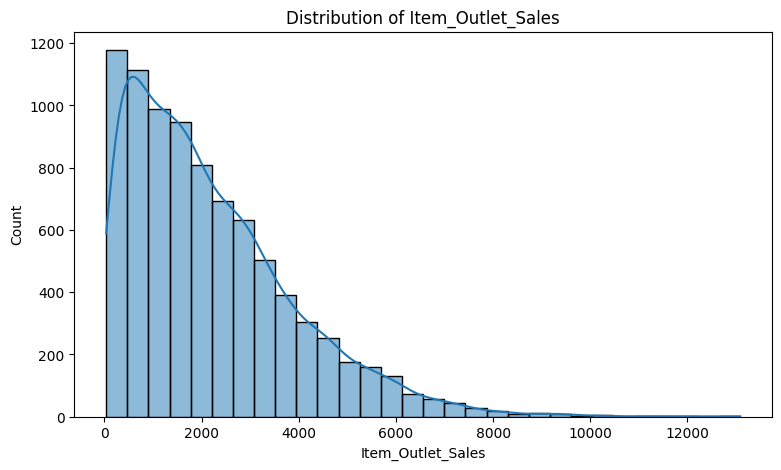

In [21]:
for column in project_12.select_dtypes(include = ["float64", "int64"]):
    plt.figure(figsize=(9, 5))
    sns.histplot(data=project_12, x=column, kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.show()

### .duplicated() and drop_duplicates()

In [22]:
project_12.duplicated().sum()

np.int64(0)

### .count()

In [23]:
project_12.count()

Item_Identifier              8523
Item_Weight                  7060
Item_Fat_Content             8523
Item_Visibility              8523
Item_Type                    8523
Item_MRP                     8523
Outlet_Identifier            8523
Outlet_Establishment_Year    8523
Outlet_Size                  6113
Outlet_Location_Type         8523
Outlet_Type                  8523
Item_Outlet_Sales            8523
dtype: int64

### .isnull().sum()

In [24]:
project_12.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

### .dropna() and .fillna()

+ İlk olarak `Item_Weight` ve `Outlet_Size` sütunlarının 3'ü de **NaN** olan satırları bulacağım ve bu satırları veri setinden çıkaracağım. Ardından aşağıdaki adımı uygulayacağım. 

+ Veri setinde **NaN** değerler `Item_Outlet_Sales (float64)`, `Outlet_Size (object)` ve `Item_Weight (float64)` sütunlarında bulunuyor. `Item_Outlet_Sales` sütunundaki NaN değerler verini setinin 3'te 1'inden fazla olduğu için buradaki değerleri **median (medyan) = ortanca** ile dolduracağız. Bunun sebebi, bu sütunun dağılımının sağa çarpık olmasıdır, bunu dağılım grafiğinde görebiliriz. `Outlet_size` sütunu kategorik olduğundan dolayı bu sütunda NaN değerleri ise **mode (mod) = en sık tekrar eden değer** ile doldurabiliriz. `Item_Weight` sütunundaki değerleri ise **mean (ortalama)** ile doldurabiliriz. 

In [25]:
project_12[project_12[["Item_Weight", "Outlet_Size"]].isna().all(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


+ 2 sütunu da **NaN** olan bir satır yok. Demek ki her kayıp değer farklı satırlarda. Belki 1 tanesinde var 1'inde yok ama sonuç olarak 2'si de kayıp olan bir satır yok.

In [26]:
mode_value = project_12['Outlet_Size'].mode()[0]
project_12['Outlet_Size'] = project_12['Outlet_Size'].fillna(mode_value)

In [27]:
project_12["Item_Weight"] = project_12["Item_Weight"].fillna(project_12["Item_Weight"].mean())

In [28]:
project_12

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [29]:
project_12.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

### .corr() and heatmap()

<Axes: >

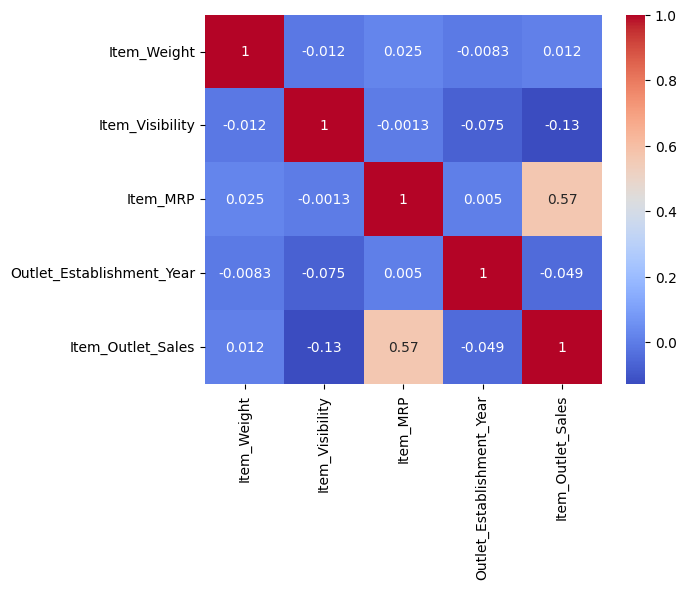

In [30]:
cor = project_12.select_dtypes(include = ["float64", "int64"]).corr()
sns.heatmap(cor, annot=True, cmap='coolwarm')

+ Benim dikkatimi `Outlet_Establishment_Year` sütunu çekti. Sayısal bir sütun ve diğer sütunlarla da ilişkisi yok. Modeli etkilememesi için bu sütunu **object** olarak değiştirebilirim

In [31]:
project_12["Outlet_Establishment_Year"] = project_12["Outlet_Establishment_Year"].astype("object")

## To Understanding Which Column is Effective on `Item_Outlet_Sales` with ANOVA and T-Test

In [32]:
import pandas as pd 
from scipy.stats import ttest_ind, f_oneway

def perform_tests(data, categorical_columns, continuous_variable):
    """
    Verilen veri çerçevesindeki kategorik değişkenler ve sürekli değişken arasındaki ilişkileri test eder.
    
    Parameters:
    - data: pd.DataFrame
        Testlerin yapılacağı veri çerçevesi.
    - categorical_columns: list
        Testlerin yapılacağı kategorik değişkenlerin sütun adlarını içeren liste.
    - continuous_variable: str
        Testlerin yapılacağı sürekli değişkenin sütun adı.
        
    Returns:
    - results: dict
        Her bir kategorik değişken için test sonuçlarını içeren sözlük. 
        Sözlük anahtarları kategorik değişken adları, değerler ise test tipi, istatistik değeri ve p değerini içeren tuple'lardır.
    """
    # Test sonuçlarını tutmak için bir sözlük
    test_results = {}

    # Kategorik sütunları dolaşarak uygun testleri uygulama
    for column in categorical_columns:
        unique_values = data[column].nunique()
        
        if unique_values == 2:  # İki kategorili değişkenler için T-Testi
            category1 = data[data[column] == data[column].unique()[0]][continuous_variable]
            category2 = data[data[column] == data[column].unique()[1]][continuous_variable]
            
            stat, p = ttest_ind(category1, category2)
            test_results[column] = ('T-Testi', stat, p)
        
        elif unique_values > 2:  # Birden fazla kategorili değişkenler için ANOVA
            groups = [data[data[column] == category][continuous_variable] for category in data[column].unique()]
            
            stat, p = f_oneway(*groups)
            test_results[column] = ('ANOVA', stat, p)

    return test_results

In [33]:
categorical_columns = project_12.select_dtypes(include=['object', 'category']).columns
continuous_variable = 'Item_Outlet_Sales'

results = perform_tests(project_12, categorical_columns, continuous_variable)

# Test sonuçlarını yazdırma
for column, (test_type, stat, p) in results.items():
    print(f"{column} için {test_type} sonucu: Stat=%.3f, p=%.3f" % (stat, p))
    if p > 0.05:
        print('Fark yok (fail to reject H0)')
    else:
        print('Fark var (reject H0)')
    print()

Item_Identifier için ANOVA sonucu: Stat=3.331, p=0.000
Fark var (reject H0)

Item_Fat_Content için T-Testi sonucu: Stat=-1.728, p=0.084
Fark yok (fail to reject H0)

Item_Type için ANOVA sonucu: Stat=2.701, p=0.000
Fark var (reject H0)

Outlet_Identifier için ANOVA sonucu: Stat=300.079, p=0.000
Fark var (reject H0)

Outlet_Establishment_Year için ANOVA sonucu: Stat=102.573, p=0.000
Fark var (reject H0)

Outlet_Size için ANOVA sonucu: Stat=41.686, p=0.000
Fark var (reject H0)

Outlet_Location_Type için ANOVA sonucu: Stat=53.948, p=0.000
Fark var (reject H0)

Outlet_Type için ANOVA sonucu: Stat=894.650, p=0.000
Fark var (reject H0)



+ Bu sütunlar arasında bir tek `Item_Fat_Content` sütununun `Item_Outlet_Sales` ile ilişkisi yok. O yüzden bu sütuna **OneHotEncoder**, diğerlerine ise **LabelEncoder** uygulayacağım ancak `Item_Identifier`'de çok fazla kategori olduğu için o sütunu kullanmayacağım.

In [34]:
project_12 = project_12.drop(columns = "Item_Identifier", axis = 1)

In [35]:
project_12.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700


### LabelEncoder

In [36]:
label_encoder = LabelEncoder()

In [37]:
related_columns = ["Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Outlet_Establishment_Year"]
for column in related_columns:
    project_12[column] = label_encoder.fit_transform(project_12[column].astype(str))

In [38]:
project_12.head(5)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,4,249.8092,9,4,1,0,1,3735.1380
1,5.92,Regular,0.019278,14,48.2692,3,8,1,2,2,443.4228
2,17.50,Low Fat,0.016760,10,141.6180,9,4,1,0,1,2097.2700
3,19.20,Regular,0.000000,6,182.0950,0,3,1,2,0,732.3800
4,8.93,Low Fat,0.000000,9,53.8614,1,1,0,2,1,994.7052


### OneHotEncoder

In [39]:
one_hot_encoder = OneHotEncoder()

In [40]:
unrelated_columns = project_12[["Item_Fat_Content"]]
unrelated_columns

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Regular
4,Low Fat
...,...
8518,Low Fat
8519,Regular
8520,Low Fat
8521,Regular


In [41]:
encoded_unrelated = one_hot_encoder.fit_transform(unrelated_columns).toarray()
encoded_unrelated = pd.DataFrame(encoded_unrelated)
encoded_unrelated

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,0.0,1.0
4,1.0,0.0
...,...,...
8518,1.0,0.0
8519,0.0,1.0
8520,1.0,0.0
8521,0.0,1.0


In [42]:
project_12 = project_12.drop(unrelated_columns, axis=1)
project_12_encoded = pd.concat([project_12.reset_index(drop=True), encoded_unrelated.reset_index(drop=True)], axis=1)

In [43]:
project_12_encoded

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,0,1
0,9.300,0.016047,4,249.8092,9,4,1,0,1,3735.1380,1.0,0.0
1,5.920,0.019278,14,48.2692,3,8,1,2,2,443.4228,0.0,1.0
2,17.500,0.016760,10,141.6180,9,4,1,0,1,2097.2700,1.0,0.0
3,19.200,0.000000,6,182.0950,0,3,1,2,0,732.3800,0.0,1.0
4,8.930,0.000000,9,53.8614,1,1,0,2,1,994.7052,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,13,214.5218,1,1,0,2,1,2778.3834,1.0,0.0
8519,8.380,0.046982,0,108.1570,7,5,1,1,1,549.2850,0.0,1.0
8520,10.600,0.035186,8,85.1224,6,6,2,1,1,1193.1136,1.0,0.0
8521,7.210,0.145221,13,103.1332,3,8,1,2,2,1845.5976,0.0,1.0


In [44]:
project_12_encoded.columns = project_12_encoded.columns.astype(str)

### More Analysis After Label and OneHot Encoder

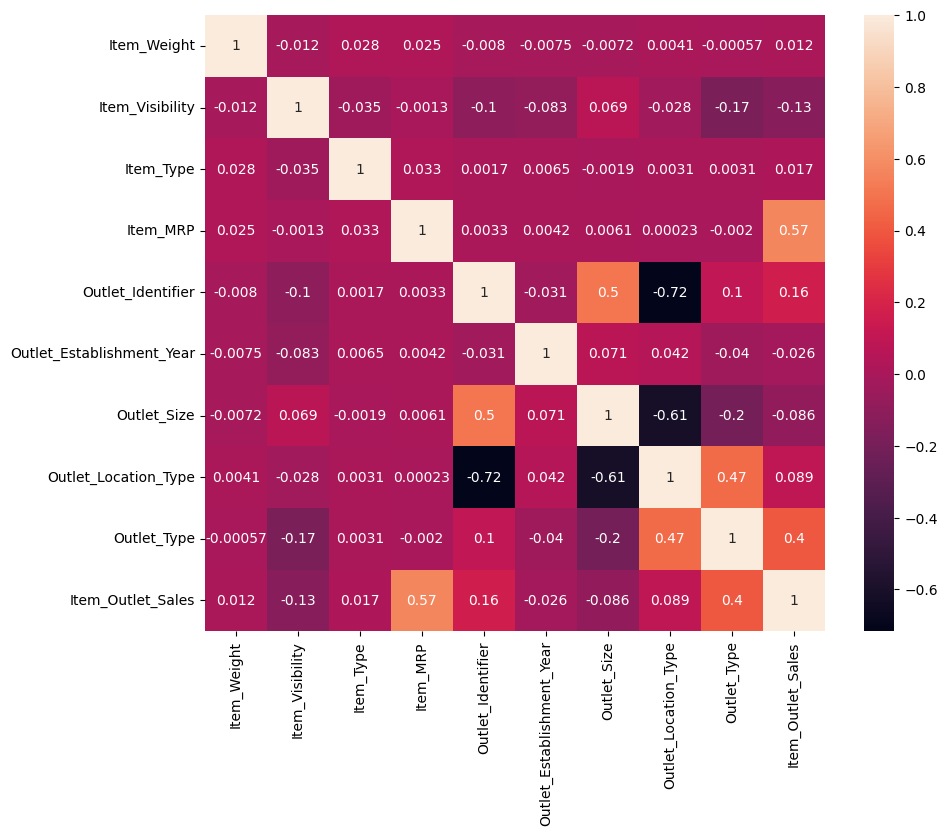

In [45]:
#.corr() and .heatmap()
plt.figure(figsize=(10, 8))
sns.heatmap(project_12.corr(), annot = True)
plt.show()

## Separating Data 

In [46]:
X = project_12_encoded.drop(columns = "Item_Outlet_Sales", axis = 1)
y = project_12_encoded["Item_Outlet_Sales"]

In [47]:
X.head(3)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,0,1
0,9.30,0.016047,4,249.8092,9,4,1,0,1,1.0,0.0
1,5.92,0.019278,14,48.2692,3,8,1,2,2,0.0,1.0
2,17.50,0.016760,10,141.6180,9,4,1,0,1,1.0,0.0


In [48]:
y

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

## Splitting Data 

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [50]:
print(X.shape, X_train.shape, X_test.shape)

(8523, 11) (6818, 11) (1705, 11)


In [51]:
print(y.shape, y_train.shape, y_test.shape)

(8523,) (6818,) (1705,)


## Feature Scaling with `StandardScaler`

In [52]:
#scaler = StandardScaler()
#scaler.fit(X_train)

In [53]:
#X_train_std = scaler.transform(X_train) 
#X_test_std = scaler.transform(X_test)

## Model Training, Evaluating and Compare with DummyRegressor

In [54]:
from sklearn.dummy import DummyRegressor
dummy = DummyRegressor(strategy = "mean").fit(X_train, y_train)

In [55]:
print("DummyRegressor'un Test Setindeki Doğruluğu:", dummy.score(X_test, y_test))

DummyRegressor'un Test Setindeki Doğruluğu: -0.004083955591431154


In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
regression_models = {"Decision Tree": DecisionTreeRegressor(),
                   "Random Forest": RandomForestRegressor(),
                   "Gradient Boosting": GradientBoostingRegressor(),
                   "Ada Boost": AdaBoostRegressor(),
                   "KNN": KNeighborsRegressor(),
                   "Linear Regression": LinearRegression(),
                   "Lasso Regression": Lasso(),
                   "Ridge Regression": Ridge(),
                   "Linear SVR": SVR(kernel = "linear"),
                   "RBF SVR": SVR(kernel = "rbf"),
                   "Polynomial SVR": SVR(kernel = "poly"),
                    "XG Boost": XGBRegressor()}

In [58]:
model_names = []
train_score = []
test_score = []
mse_score = []
r2score = []

for name, reg in regression_models.items():
    reg.fit(X_train, y_train)
    predictions = reg.predict(X_test)
    score_train = reg.score(X_train, y_train)
    score_test = reg.score(X_test, y_test)
    score_mse = mean_squared_error(y_test, predictions)
    score_r2 = r2_score(y_test, predictions)
    
    model_names.append(name)
    train_score.append(score_train)
    test_score.append(score_test)
    mse_score.append(score_mse)
    r2score.append(score_r2)
    
    print(f"{name} Train setindeki doğruluk: {score_train}")
    print(f"{name} Test setindeki doğruluk: {score_test}")
    print(f"{name} MSE Skoru: {score_mse}")
    print(f"{name} R^2 Skoru: {score_r2}\n")

Decision Tree Train setindeki doğruluk: 1.0
Decision Tree Test setindeki doğruluk: 0.16823879108826323
Decision Tree MSE Skoru: 2260702.0683950386
Decision Tree R^2 Skoru: 0.16823879108826323

Random Forest Train setindeki doğruluk: 0.9383043489011829
Random Forest Test setindeki doğruluk: 0.5691122638199055
Random Forest MSE Skoru: 1171139.9690097398
Random Forest R^2 Skoru: 0.5691122638199055

Gradient Boosting Train setindeki doğruluk: 0.6311042706793712
Gradient Boosting Test setindeki doğruluk: 0.6064328305454433
Gradient Boosting MSE Skoru: 1069703.7857805565
Gradient Boosting R^2 Skoru: 0.6064328305454433

Ada Boost Train setindeki doğruluk: 0.4841052722371082
Ada Boost Test setindeki doğruluk: 0.47929835438200874
Ada Boost MSE Skoru: 1415251.4864277686
Ada Boost R^2 Skoru: 0.47929835438200874

KNN Train setindeki doğruluk: 0.6297874665986428
KNN Test setindeki doğruluk: 0.45041000367185635
KNN MSE Skoru: 1493769.1589318889
KNN R^2 Skoru: 0.45041000367185635

Linear Regression T

## Working with `test` Set

+ `test` isimli veri setinin kullanılabilmesi için, `project_12 = train` isimli veri setine uygulanan her şey bu veri setine de uygulanmalı ve aynı hale getirilmeli

### Model Kurma Kısmına Kadar Yapılan Adımlar

In [59]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store


In [60]:
#'Item_Fat_Content' sütununda LF, low fat ve reg kateogrileri farklı yazılmış olsa da Low Fat ve Regular ile aynı kategoridir
test["Item_Fat_Content"] = test["Item_Fat_Content"].replace({"low fat": "Low Fat", "LF": "Low Fat", "reg": "Regular"})

In [61]:
#.duplicated() and .drop_duplicates()
test.duplicated().sum()

np.int64(0)

In [62]:
#.isnull().sum()
print(test.isnull().sum(), "\n")


Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64 



In [63]:
test[test[["Item_Weight", "Outlet_Size"]].isna().all(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [64]:
mode_value = test['Outlet_Size'].mode()[0]
test['Outlet_Size'] = test['Outlet_Size'].fillna(mode_value)

In [65]:
test["Item_Weight"] = test["Item_Weight"].fillna(test["Item_Weight"].mean())

In [66]:
test.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.75,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.30,Regular,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NCN55,14.60,Low Fat,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store


In [67]:
test = test.drop(columns = "Item_Identifier", axis = 1)

In [68]:
test_related_columns = ["Item_Type", "Outlet_Identifier", "Outlet_Size", "Outlet_Location_Type", "Outlet_Type", "Outlet_Establishment_Year"]
for column in test_related_columns:
    test[column] = label_encoder.fit_transform(test[column].astype(str))

In [69]:
test.head(3)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,20.75,Low Fat,0.007565,13,107.8622,9,4,1,0,1
1,8.30,Regular,0.038428,4,87.3198,2,7,1,1,1
2,14.60,Low Fat,0.099575,11,241.7538,0,3,1,2,0


In [70]:
unrelated_columns = test[["Item_Fat_Content"]]
unrelated_columns

,Item_Fat_Content
0,Low Fat
1,Regular
2,Low Fat
3,Low Fat
4,Regular
...,...
5676,Regular
5677,Regular
5678,Low Fat
5679,Regular


In [71]:
encoded_unrelated = one_hot_encoder.fit_transform(unrelated_columns).toarray()
encoded_unrelated = pd.DataFrame(encoded_unrelated)
encoded_unrelated

,0,1
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,1.0
...,...,...
5676,0.0,1.0
5677,0.0,1.0
5678,1.0,0.0
5679,0.0,1.0


In [72]:
test = test.drop(unrelated_columns, axis=1)
test_encoded = pd.concat([test.reset_index(drop=True), encoded_unrelated.reset_index(drop=True)], axis=1)

In [73]:
test_encoded.columns = test_encoded.columns.astype(str)

In [78]:
test_encoded.head(2)

,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,0,1
0,20.75,0.007565,13,107.8622,9,4,1,0,1,1.0,0.0
1,8.30,0.038428,4,87.3198,2,7,1,1,1,0.0,1.0


+ `test` isimli veri seti, `test_encoded` olarak kullanılabilir hale geldi.

### XGBoost Modeli Üzerinde Denemeler

In [74]:
xg_boost = XGBRegressor()
xg_boost.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [75]:
xg_boost_pred = xg_boost.predict(X_test)
print("XG Boost modelinin R2 Skoru:", r2_score(y_test, xg_boost_pred))

XG Boost modelinin R2 Skoru: 0.5237905820710755


In [79]:
xg_boost_test_pred = xg_boost.predict(test_encoded)

In [85]:
xg_boost_test_pred

array([ 936.7789 , 1099.5195 ,  109.42593, ..., 1872.3772 , 4130.458  ,
       1580.7751 ], dtype=float32)

In [84]:
xg_boost_test_pred.mean()

np.float32(2203.7363)